# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [15]:
import pandas as pd

rx_drop_boxes = pd.read_csv('/home/jupyter-jenni-nahm/hds5210-2022/final/Prescription_Drug_Drop_Boxes.csv')
rx_drop_boxes

,FACILITY,ADDRESS,CITY,STATE,ZIP,CREDENTIALID,LAWENFORCEMENT,New Georeferenced Column
0,NEW BRITAIN POLICE DEPARTMENT,10 CHESTNUT ST,NEW BRITAIN,CT,06051-2654,1349023,True,POINT (-72.78093 41.6658)
1,WATERBURY POLICE DEPARTMENT,255 E MAIN ST,WATERBURY,CT,06702-2301,1143916,True,POINT (-73.03629 41.55461)
2,ANSONIA POLICE DEPARTMENT,65 Main Street,ANSONIA,CT,06401-3310,1075890,True,POINT (-73.07959 41.345408)
3,SOUTH WINDSOR POLICE DEPARTMENT,151 SAND HILL RD,SOUTH WINDSOR,CT,06074-2026,1157538,True,POINT (-72.55222 41.83585)
4,BRISTOL POLICE DEPARTMENT,131 N MAIN ST,BRISTOL,CT,06010-8123,1424496,True,POINT (-72.946121 41.674226)
...,...,...,...,...,...,...,...,...
108,Middlebury Police Dept.,200 Southford Road,Middlebury,CT,06762,2206784,True,POINT (-73.137679 41.518361)
109,St. Vincent's Outpatient Pharmacy,2800 Main Street,Bridgeport,CT,06606,2002416,False,POINT (-73.202955 41.200782)
110,WOLCOTT POLICE DEPT.,225 NICHOLS RD,WOLCOTT,CT,06716-2718,1055726,True,POINT (-72.98357 41.57877)
111,RIDGEFIELD POLICE DEPT.,76 EAST RIDGE RD,RIDGEFIELD,CT,06877-5022,1035832,True,POINT (-73.49381 41.28053)


In [16]:
columns = rx_drop_boxes.shape[1] # shape = (rows, columns)
columns

8

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [17]:
# make dictionary to hold columns as 'keys' and how many unique values they have as 'values'

column_counts = {}

for column in rx_drop_boxes.columns:
    column_counts[column] = len(rx_drop_boxes[column].unique())
    
column_counts

{'FACILITY': 113,
 'ADDRESS': 113,
 'CITY': 93,
 'STATE': 1,
 'ZIP': 113,
 'CREDENTIALID': 113,
 'LAWENFORCEMENT': 2,
 'New Georeferenced Column': 113}

In [18]:
# make list to hold column(s) with highest number of unique values to determine is there is data diversity

most_values = []

for key, value in column_counts.items():
    if 'id' in key.lower(): # ignores any kind of identification column
        continue
    if value == max(column_counts.values()):
        most_values.append(key)
        
most_values

['FACILITY', 'ADDRESS', 'ZIP', 'New Georeferenced Column']

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [19]:
# make list to hold column(s) with fewest number of unique values to determine if there is data redudancy

least_values = []

for key, value in column_counts.items():
    if value == min(column_counts.values()):  
        least_values.append(key)
        
least_values

['STATE']

### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

(array([23.,  5.,  6., 16., 28.,  6.,  6., 10., 13.,  0.]),
 array([6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000]),
 <a list of 10 Patch objects>)

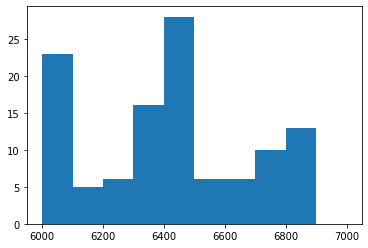

In [20]:
# make histogram to show frequency of zip codes grouped by the 100s

rx_drop_boxes['ZIP'] = rx_drop_boxes['ZIP'].str[:5].astype(int) # makes zip code uniform up to 5 digits, cast as integers

import matplotlib.pyplot as plt
plt.hist(rx_drop_boxes['ZIP'], bins=[6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000])

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

In [32]:
# this code can be used to determine if a column is not uniformly cased (such as not all uppercase) which may be useful in data cleaning

rx_drop_boxes = rx_drop_boxes.astype(str) # makes all values in df str

# check to see which columns do not have uniform casing
for column in rx_drop_boxes.columns:
    for row in range(len(rx_drop_boxes[column])):
        if rx_drop_boxes[column][row].isnumeric(): # skips number-only values
            continue
        elif not rx_drop_boxes[column][row].isupper():
            print('Column ' + column + ' has lowercase values.')
            break # only concerned with 1 instance of lowercase when we want uppercase values

Column FACILITY has lowercase values.
Column ADDRESS has lowercase values.
Column CITY has lowercase values.
Column LAWENFORCEMENT has lowercase values.


As we can see from the output, we have four columns that have at least one value with lowercase characters. For data cleaning purposes, it is usually best to have a uniform way the values are stored. One might try to create a filter for a specific city, and if the name is all uppercase in a few entries and mixed-cased in the rest, then only a portion of those cities are included unless upper() is called. If one has multiple filters, then the function can become tedious. Instead one can use the code above to find which columns are not uniform, and then use upper() on the specific column(s) instead of doing it one-by-one. It is interesting to note that this dataset came directly from a Connecticut government website and it has multiple case discrepancies.  



---



## Submitting Your Work

Submit your work as usual.